In [2]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import os

os.chdir("..")
from legacy_code.TMFG_core import TMFG as LegacyTMFG
from TMFG_core import TMFG


In [3]:
def run(size):
    random_matrix = np.random.rand(size, size)
    # Make it symmetric by averaging with its transpose
    W = (random_matrix + random_matrix.T) / 2

    start = time.time()
    _, _, fast_tmfg_adjacency_matrix = LegacyTMFG().fit_transform(pd.DataFrame(W), output='unweighted_sparse_W_matrix')
    legacy_tmfg_time = time.time() - start
    print(f"Fast TMFG took {legacy_tmfg_time} seconds")

    start = time.time()
    _, _, tmfg_adjacency_matrix = TMFG().fit_transform(weights=W.copy(), output='unweighted_sparse_W_matrix')
    tmfg_time = time.time() - start
    print(f"TMFG took {tmfg_time} seconds")

    return legacy_tmfg_time, tmfg_time


In [4]:
result = []
test_sizes = [i * 100 for i in range(1, 10)] + [i * 1000 for i in range(1, 11)]
for size in test_sizes:
    legacy_tmfg_average, tmfg_average = 0, 0
    for _ in range(3):
        legacy_tmfg_time, tmfg_time = run(size)
        legacy_tmfg_average += legacy_tmfg_time
        tmfg_average += tmfg_time

    legacy_tmfg_average /= 3
    tmfg_average /= 3
    result.append([size, legacy_tmfg_average, tmfg_average])


Fast TMFG took 0.014344930648803711 seconds
TMFG took 0.0013980865478515625 seconds
Fast TMFG took 0.00986480712890625 seconds
TMFG took 0.001294851303100586 seconds
Fast TMFG took 0.01070713996887207 seconds
TMFG took 0.0014019012451171875 seconds
Fast TMFG took 0.021838903427124023 seconds
TMFG took 0.0031480789184570312 seconds
Fast TMFG took 0.022460222244262695 seconds
TMFG took 0.0028209686279296875 seconds
Fast TMFG took 0.02290797233581543 seconds
TMFG took 0.0029439926147460938 seconds
Fast TMFG took 0.03677821159362793 seconds
TMFG took 0.005118131637573242 seconds
Fast TMFG took 0.035955190658569336 seconds
TMFG took 0.005176067352294922 seconds
Fast TMFG took 0.03740501403808594 seconds
TMFG took 0.0052564144134521484 seconds
Fast TMFG took 0.0528719425201416 seconds
TMFG took 0.007103919982910156 seconds
Fast TMFG took 0.0538790225982666 seconds
TMFG took 0.008121728897094727 seconds
Fast TMFG took 0.055226802825927734 seconds
TMFG took 0.006926059722900391 seconds
Fast TM

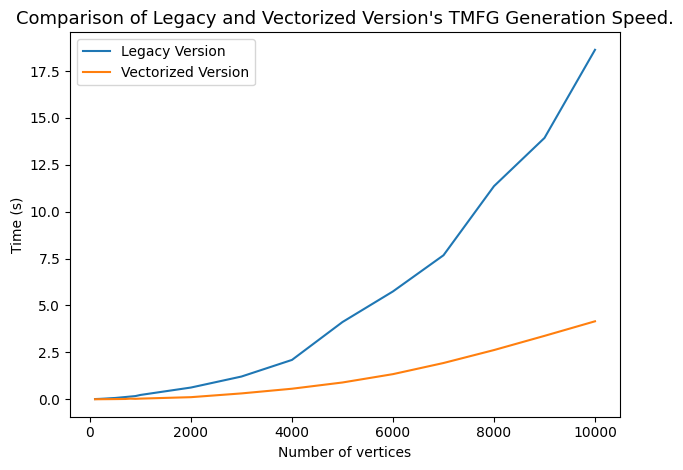

In [9]:
result = np.array(result)
plt.plot(result[:, 0], result[:, 1], label='Legacy Version')
plt.plot(result[:, 0], result[:, 2], label='Vectorized Version')
plt.title("Comparison of Legacy and Vectorized Version's TMFG Generation Speed.")
plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.legend()
plt.tight_layout()
plt.show()


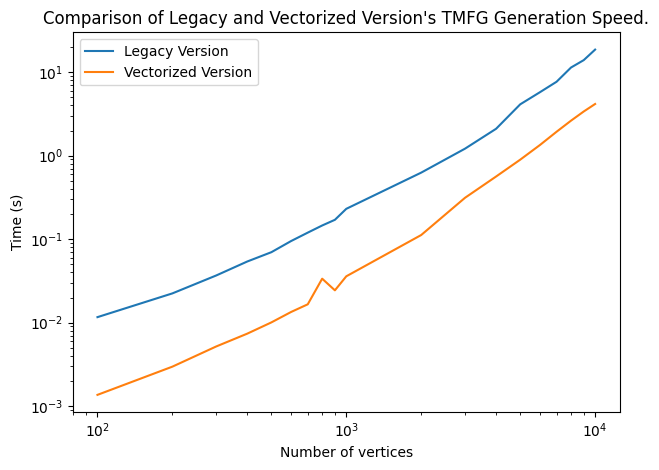

In [10]:
plt.plot(result[:, 0], result[:, 1], label='Legacy Version')
plt.plot(result[:, 0], result[:, 2], label='Vectorized Version')
plt.title("Comparison of Legacy and Vectorized Version's TMFG Generation Speed.")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.legend()
plt.tight_layout()
plt.show()
